In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics

# K Vecinos Cercanos

In [91]:
data = load_digits()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
vars_cols = list(df)
df['target'] = data.target
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


## Modelo

### Entrenamiento

Se dividen los datos de entrenamiento y evaluación

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    df[vars_cols], df.target, test_size=0.33, random_state=0)

Text(0, 0.5, 'Mean Error')

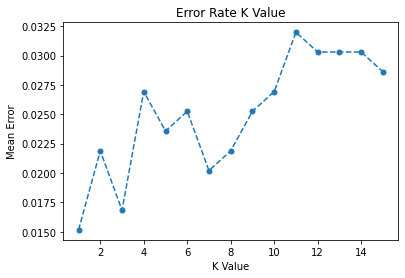

In [101]:
error = []
max_k = 15

# Calculating error for K values between 1 and 40
for i in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.plot(range(1, max_k + 1), error, linestyle='--', marker='.', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [48]:
model = KNeighborsClassifier(n_neighbors=)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

### Evaluación

Se analizan las predicciones del modelo en el conjunto de datos de evaluación

In [49]:
y_pred = model.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_report = metrics.classification_report(y_test, y_pred)

Gráfica de matriz de confusión

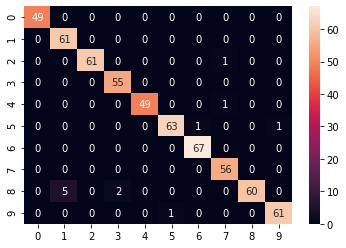

In [50]:
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.show()

In [51]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.92      1.00      0.96        61
           2       1.00      0.98      0.99        62
           3       0.96      1.00      0.98        55
           4       1.00      0.98      0.99        50
           5       0.98      0.97      0.98        65
           6       0.99      1.00      0.99        67
           7       0.97      1.00      0.98        56
           8       1.00      0.90      0.94        67
           9       0.98      0.98      0.98        62

    accuracy                           0.98       594
   macro avg       0.98      0.98      0.98       594
weighted avg       0.98      0.98      0.98       594



## Demostración del modelo

<Figure size 432x288 with 0 Axes>

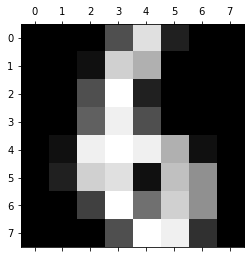

Predicted digit: 6
Real digit: 6


In [102]:
# Correr repetidamente para observar varios casos
x = X_test.sample(1)
index = x.index[0]

plt.gray()
plt.matshow(data.images[index]) 
plt.show()

print('Predicted digit:', model.predict(x)[0])
print('Real digit:', y_test.loc[index])